# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split

# Loading the data

In [2]:
DATA_DIR = 'flowers'
CATEGORIES = os.listdir(DATA_DIR)
HEIGHT = 100
WIDTH = 100
CHANNEL = 3
data = []

for category in CATEGORIES:
    path = os.path.join(DATA_DIR,category)
    cat = CATEGORIES.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img),CHANNEL)
            new_array = cv2.resize(img_array, (HEIGHT,WIDTH))
            data.append([new_array,cat])
        except Exception as E:
            pass

In [3]:
#checking shape
np.shape(data)

(4323, 2)

# separating feature and label

In [4]:
X = []
Y = []
for feature, label in data:
    X.append(feature)
    Y.append(label)

X = np.array(X)
Y = np.array(Y)

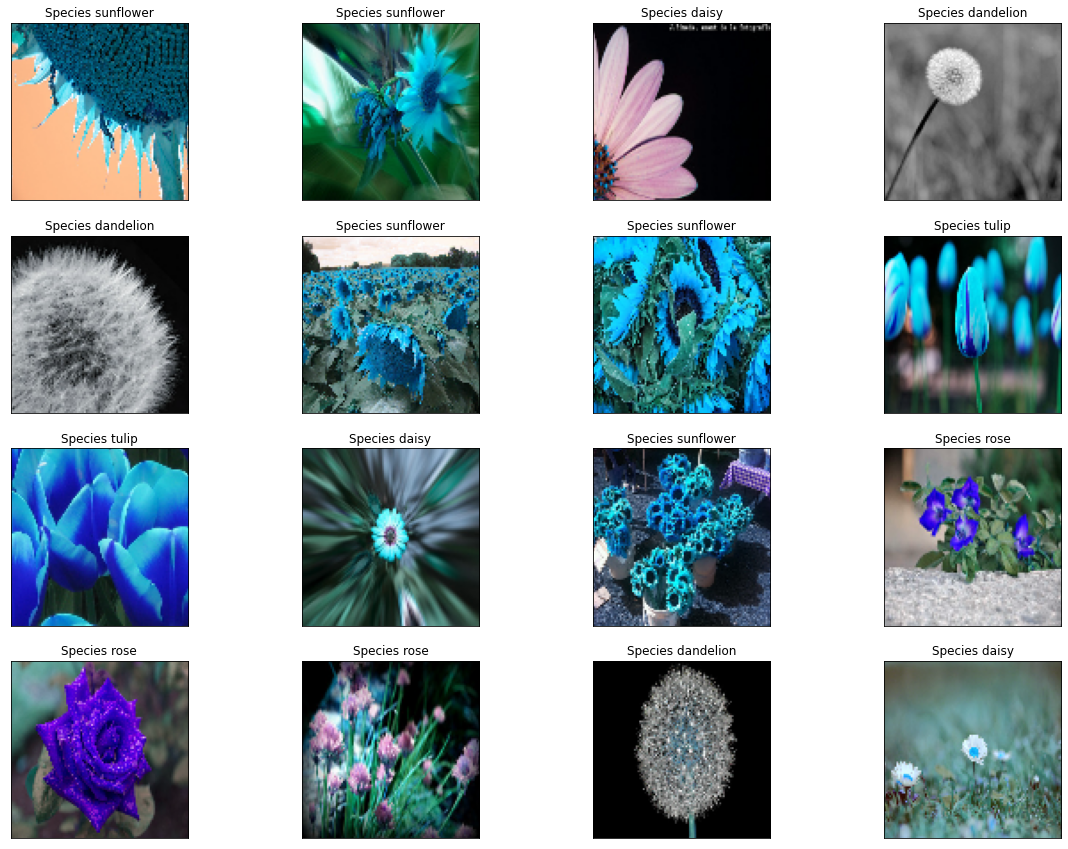

In [5]:


val = np.random.randint(0, X.shape[0], 16)
r = 1
plt.figure(figsize=(20,15))
for value in val:
    
    plt.subplot(4,4,r)
    r += 1
    plt.title('Species '+CATEGORIES[Y[value]])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[value])
    
plt.show()



In [6]:
from keras.utils import to_categorical
Y = to_categorical(Y)

Using TensorFlow backend.
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/fra

# Spliting the data into test train and validation

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [8]:
np.shape(x_train)

(3458, 100, 100, 3)

In [9]:
# from keras.preprocessing.image import ImageDataGenerator




# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(x_train)

# Model

In [10]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(HEIGHT, WIDTH, CHANNEL)))
model.add(Flatten())
model.add(Dense(625,activation='relu'))
model.add(Dense(125,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 625)               2880625   
_________________________________________________________________
dense_2 (Dense)              (None, 125)               78250     
_________________________________________________________________
dense_3 (Dense)              (None, 25)                3150      
_________________________________________________________________
dense_4 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 5)               

In [ ]:
model.fit(x_train,y_train, batch_size=32, epochs = 200, validation_split=0.1)


Train on 3112 samples, validate on 346 samples
Epoch 1/200
 768/3112 [======>.......................] - ETA: 11:41 - loss: 5.3409 - accuracy: 0.2253